# Setup de los datos y catálogos

In [34]:
#Importamos librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [35]:
#Importamos los datos 
datos = pd.read_csv('datos_abiertos_covid19/200527COVID19MEXICO.csv')

#Importamos 

In [36]:
#Vemos las estructura que tienen los datos
datos.head()

,ID_REGISTRO,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,1ba22b,3,25,2,25,2,23/04/2020,16/04/2020,27/04/2020,1,...,2,2,1,1,1,2,2,99,1,2
1,00b59f,3,27,2,27,2,24/04/2020,20/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,1,1,1
2,157def,4,2,2,26,2,08/04/2020,08/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,99,1,2
3,170aea,4,9,2,15,1,16/04/2020,08/04/2020,29/04/2020,97,...,2,2,1,2,2,2,1,99,1,97
4,01dea4,4,9,2,9,1,20/04/2020,07/04/2020,30/04/2020,97,...,2,2,2,2,1,2,2,99,1,97


Las columnas que tienen solo números, tienen su respectivo diccionario (qué significa cada cosa), primero añado los catalogos:

In [37]:
si_no = {
        '1':'SI', 
        '2':'NO', 
        '97':'NO APLICA', 
        '98':'SE IGNORA', 
        '99':'NO ESPECIFICADO'}

sexo = {
        '1':'MUJER',
        '2':'HOMBRE',
        '99':'NO ESPECIFICADO'
        }

sector = {
        '1': 'CRUZ ROJA',
        '2': 'DIF',
        '3': 'ESTATAL',
        '4': 'IMSS',
        '5': 'IMSS-BIENESTAR',
        '6': 'ISSSTE',
        '7': 'MUNICIPAL',
        '8': 'PEMEX',
        '9': 'PRIVADA',
        '10': 'SEDENA',
        '11': 'SEMAR',
        '12': 'SSA',
        '13': 'UNIVERSITARIO',
        '99': 'NO ESPECIFICADO'
        }

paciente = {
        '1':'AMBULATORIO',
        '2':'HOSPITALIZADO',
        '99':'NO ESPECIFICADO'
        }

resultado = {
        '1':'Positivo SARS-CoV-2',
        '2':'No positivo SARS-CoV-2',
        '3':'Resultado pendiente'
        }

entidades = {
        '01': 'AGUASCALIENTES',
        '02': 'BAJA CALIFORNIA',
        '03': 'BAJA CALIFORNIA SUR',
        '04': 'CAMPECHE',
        '05': 'COAHUILA DE ZARAGOZA',
        '06': 'COLIMA',
        '07': 'CHIAPAS',
        '08': 'CHIHUAHUA',
        '09': 'CIUDAD DE MÉXICO',
        '10': 'DURANGO',
        '11': 'GUANAJUATO',
        '12': 'GUERRERO',
        '13': 'HIDALGO',
        '14': 'JALISCO',
        '15': 'MÉXICO',
        '16': 'MICHOACÁN DE OCAMPO',
        '17': 'MORELOS',
        '18': 'NAYARIT',
        '19': 'NUEVO LEÓN',
        '20': 'OAXACA',
        '21': 'PUEBLA',
        '22': 'QUERÉTARO',
        '23': 'QUINTANA ROO',
        '24': 'SAN LUIS POTOSÍ',
        '25': 'SINALOA',
        '26': 'SONORA',
        '27': 'TABASCO',
        '28': 'TAMAULIPAS',
        '29': 'TLAXCALA',
        '30': 'VERACRUZ DE IGNACIO DE LA LLAVE',
        '31': 'YUCATÁN',
        '32': 'ZACATECAS',
        '36': 'ESTADOS UNIDOS MEXICANOS',
        '97': 'NO APLICA',
        '98': 'SE IGNORA',
        '99': 'NO ESPECIFICADO'
}

Ahora creo un diccionario de que cátalogo le corresponde cada columna del dataframe:

In [38]:
columna = {
        'SECTOR': sector,                                                            
        'ENTIDAD_UM': entidades,
        'SEXO': sexo,                    
        'ENTIDAD_RES': entidades,
        'TIPO_PACIENTE': paciente,
        'RESULTADO': resultado,
        'INTUBADO':si_no,	                                                             
        'NEUMONIA':si_no,                                                          
        'EMBARAZO':si_no,	                                                              
        'DIABETES':si_no,	                                                                
        'EPOC':si_no,                                                           
        'ASMA':si_no,                                                               
        'INMUSUPR':si_no,	                                                                
        'HIPERTENSION':si_no,                                                                 
        'CARDIOVASCULAR':si_no,	                                                                 
        'OBESIDAD':si_no,                                                                  
        'RENAL_CRONICA':si_no,                                                       
        'TABAQUISMO':si_no,	                                                            
        'OTRO_CASO':si_no,	                                                                       
        'UCI':si_no                                                                  
}

In [39]:
#Ejemplo de uso
print(columna['SEXO']['2'])

print(columna['ENTIDAD_RES']['05'])

HOMBRE
COAHUILA DE ZARAGOZA


# Probabilidad de muerte dada una complicación de salud previa

En este caso calcularemos la probabilidad de morir dado que se tiene cierta complicación de salud. (**Ojo:** Toda la muestra de analisis está confirmada con Coronavirus). 

In [112]:
#Filtramos unicamente los casos positivos confirmados 
enfermos = datos[datos['RESULTADO'] == 1]

enfermos.columns

Index(['ID_REGISTRO', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF',
       'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'UCI'],
      dtype='object')

In [113]:
#Obtenemos la probabilidad general de muertes
enfermos_totales = len(enfermos)
muertos_totales = len(enfermos[enfermos['FECHA_DEF'] != '9999-99-99'])

p_general = muertos_totales/enfermos_totales
print(p_general)

0.11018545813413994


In [131]:
#Obtenemos la probabilidad de muerte de una persona sin complicaciones de salud
complicaciones = enfermos.columns[12:22]   #Los nombres de las complicaciones

sin_comp = datos[datos['RESULTADO'] == 1]  #Filtro solo confirmados ccon COVID

for i, complicacion in enumerate(complicaciones):
    sin_comp = sin_comp[sin_comp[complicacion] == 2] #Filtro todas las enfermedades
    
n_sin_comp = len(sin_comp)
muertos_sin_comp = len(sin_comp[sin_comp['FECHA_DEF'] != '9999-99-99'])

p_sano = muertos_sin_comp/n_sin_comp
print(p_sano)

0.03169263456090651


In [143]:
# Obtenemos los diferentes datos para cada tipo de complicación de salud

p_muerte_comp = [] #Aqui guardaremos los datos

for i, complicacion in enumerate(complicaciones):
    p_muerte_comp.append([])
    p_muerte_comp[i].append(complicacion)  #Anexamos el nombre de la complicacion
    
    casos = enfermos[enfermos[complicacion] == 1]
    n_casos = len(casos)   
    p_muerte_comp[i].append(n_casos)  #Número de casos con esa complicación
    
    muertos = casos[casos['FECHA_DEF'] != '9999-99-99']
    n_muertos = len(muertos)
    p_muerte_comp[i].append(n_muertos)  #Número de muertos con esa complicacion de salud
    
    probabilidad = n_muertos/n_casos   #Probabilidad condicional
    p_muerte_comp[i].append(probabilidad)
    
p_muerte_comp.append(['GENERAL', enfermos_totales, muertos_totales, p_general])  # Añado el general nacional
p_muerte_comp.append(['SANOS', n_sin_comp, muertos_sin_comp, p_sano])
    
p_muerte_comp = pd.DataFrame(p_muerte_comp, columns = ['Complicación', 'Casos', 'Defunciones', 'Probabilidad'])
p_muerte_comp

,Complicación,Casos,Defunciones,Probabilidad
0,EMBARAZO,486,13,0.026749
1,DIABETES,13854,3223,0.232640
2,EPOC,1588,481,0.302897
3,ASMA,2290,196,0.085590
4,INMUSUPR,1216,262,0.215461
5,HIPERTENSION,16444,3583,0.217891
6,CARDIOVASCULAR,2056,487,0.236868
7,OBESIDAD,16053,2306,0.143649
8,RENAL_CRONICA,1840,595,0.323370
9,TABAQUISMO,6470,812,0.125502


Graficamos estos resultados:

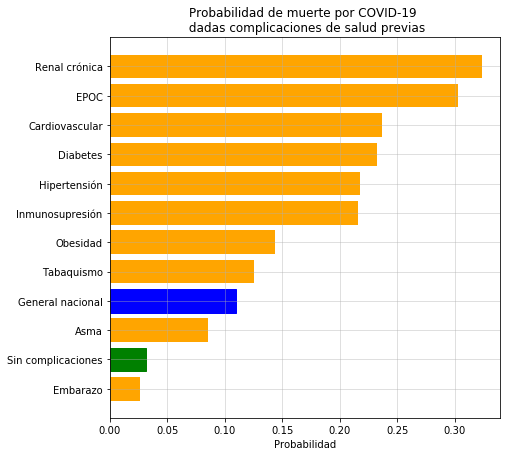

In [144]:
ordenados = p_muerte_comp.sort_values(by='Probabilidad') #Ordenamos de acuerdo a la probabilidad

index = ordenados['Complicación']
labels = ['Renal crónica', 'EPOC', 'Cardiovascular', 'Diabetes', 
          'Hipertensión', 'Inmunosupresión', 'Obesidad', 'Tabaquismo', 
          'General nacional', 'Asma', 'Sin complicaciones', 'Embarazo']
y = ordenados['Probabilidad']
x = [i for i in range(len(index))]

fig, ax = plt.subplots(figsize = (7,7))

grafica = ax.barh(x, y, color = 'orange')

grafica[1].set_color('g')
grafica[3].set_color('b')

ax.grid(alpha = 0.5)
ax.set_title('Probabilidad de muerte por COVID-19 \n dadas complicaciones de salud previas')
plt.yticks([11, 10, 9, 8,7,6,5,4,3,2,1,0])
ax.set_yticklabels(labels)
ax.set_xlabel('Probabilidad')

plt.show()

# Probabilidad de muerte dado grupo de edad

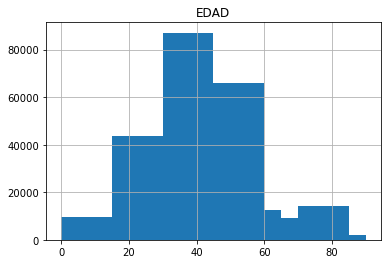

In [154]:
bins = [0, 15, 30, 45, 60, 65, 70, 85, 90]

grupo_edad = []